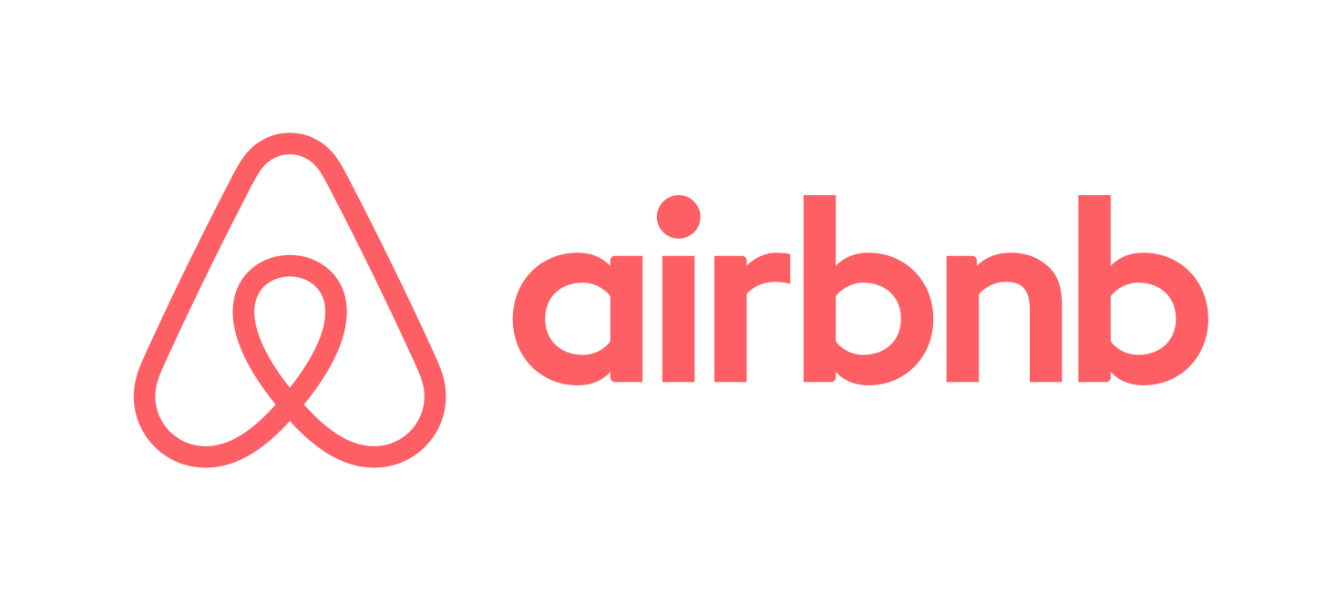

## MSCA 37014- Python for Analytics 

### Airbnb Project

Airbnb is interested in better understanding data relating to price of listings on their website. They want to gain insight into its usefulness in the listing assessment process. The dataset consists of a random sample of homes that have been booked in Amsterdam during December 2020.

A data dictionary is saved as an excel file here: 

In [36]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rc('figure', figsize=(10,5))
figsize_with_subplots = (10,10)
bin_size=10
plt.rcParams.update({'figure.max_open_warning': 0})
%pprint = False

Pretty printing has been turned OFF


In [2]:
df = pd.read_csv('data/listings.csv.gz')

## Exploratory Data Analysis

Three main components of exploring data:
1. Understanding variables 
2. Cleaning your dataset
3. Analyzing relationships between variables

### Understanding variables

In [3]:
df.shape

(16116, 74)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210907032724,2021-09-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Single level home"", ""Coffee maker"", ""Long te...",$59.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,3,28,55,124,2021-09-07,280,2,0,2013-08-25,2019-11-21,4.89,4.93,5.00,4.97,4.97,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.86
1,20168,https://www.airbnb.com/rooms/20168,20210907032724,2021-09-07,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2021-09-07,339,0,0,2014-01-17,2020-03-27,4.44,4.69,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.64
2,25428,https://www.airbnb.com/rooms/25428,20210907032724,2021-09-07,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",NaN,NaN,0%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37490,4.88487,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Cable TV

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16116 non-null  int64  
 1   listing_url                                   16116 non-null  object 
 2   scrape_id                                     16116 non-null  int64  
 3   last_scraped                                  16116 non-null  object 
 4   name                                          16086 non-null  object 
 5   description                                   15893 non-null  object 
 6   neighborhood_overview                         10405 non-null  object 
 7   picture_url                                   16116 non-null  object 
 8   host_id                                       16116 non-null  int64  
 9   host_url                                      16116 non-null 

In [6]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.611600e+04,1.611600e+04,1.611600e+04,16111.000000,16111.000000,0.0,16116.000000,16116.000000,16116.000000,0.0,15218.000000,16019.000000,16116.000000,16116.000000,16113.000000,16113.000000,16113.000000,1.611300e+04,16113.000000,1.611300e+04,0.0,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,14029.000000,13815.000000,13816.000000,13807.000000,13812.000000,13807.000000,13807.000000,16116.000000,16116.000000,16116.000000,16116.000000,14029.000000
mean,2.118184e+07,2.021091e+13,6.976052e+07,2.023338,2.023338,NaN,52.365510,4.889434,2.836684,NaN,1.530096,1.758100,3.991189,608.146811,3.953578,4.149134,685.520449,2.672465e+05,4.025489,2.666400e+05,NaN,4.026309,8.839787,14.321730,55.316890,24.645383,1.386262,0.325453,4.691878,4.811200,4.701267,4.847800,4.868875,4.728831,4.600638,1.636883,1.096674,0.489514,0.008067,0.677467
std,1.352063e+07,1.683646e+00,9.027164e+07,23.344729,23.344729,NaN,0.016563,0.036151,1.312016,NaN,0.951085,1.467627,20.987452,540.665822,20.988709,21.034236,532.480917,2.392451e+07,20.996160,2.387038e+07,NaN,8.702405,18.140200,28.508009,107.907731,56.707709,7.477153,2.025282,0.668502,0.345724,0.440648,0.307706,0.299283,0.328007,0.390520,2.402076,1.870279,1.531128,0.134829,1.720379
min,2.818000e+03,2.021091e+13,3.159000e+03,0.000000,0.000000,NaN,52.290340,4.755710,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.018020e+07,2.021091e+13,9.735558e+06,1.000000,1.000000,NaN,52.355130,4.863690,2.000000,NaN,1.000000,1.000000,2.000000,21.000000,2.000000,2.000000,28.000000,2.800000e+01,2.000000,2.800000e+01,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.670000,4.750000,4.600000,4.820000,4.850000,4.600000,4.500000,1.000000,1.000000,0.000000,0.000000,0.110000
50%,1.926593e+07,2.021091e+13,2.974134e+07,1.000000,1.000000,NaN,52.364880,4.886900,2.000000,NaN,1.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.860000,4.910000,4.830000,4.950000,4.980000,4.810000,4.670000,1.000000,1.000000,0.000000,0.000000,0.270000
75%,3.107548e+07,2.021091e+13,8.988321e+07,1.000000,1.000000,NaN,52.375440,4.909160,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,2.000000,5.000000,47.000000,22.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,0.000000,0.000000,0.620000
max,5.208280e+07,2.021091e+13,4.210037e+08,1992.000000,1992.000000,NaN,52.425340,5.066508,16.000000,NaN,50.000000,33.000000,1100.000000,1825.000000,1100.000000,1100.000000,1825.000000,2.147484e+09,1100.000000,2.142625e+09,NaN,30.000000,60.000000,90.000000,365.000000,877.000000,422.000000,137.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,30.000000,21.000000,4.000000,107.840000


Some quick observations:

- host_listings count is highly sqewed. Probably an outlier in there. The max is 1992 when 75% of the data is 1. 
- Same with host_total_listings_count 
- neihbourhood_group_cleansed has no values 
- accomodates also seems to have a few really large values.
- bathrooms has no values
- bedroom seems to have an outlier. the max bedroom is 50. Same with beds (33), min_nights (1100), max_nights (1825), min_min_nights (1100), max_min_nights (1100), min_max_nights (1825), min_nights_avg_ntm (1100) 
- Not sure what the column max_max_nights represents. Shows really large values. 
- calendar_updated has no values 
- availability also seems to be highly skewed
- no of reviews alos seems to be highly skewed

In [63]:
# separating the catgorical and numerical variables 
# Not including url columns in categorical and id cols in numerical
cat_cols = []
num_cols = []
extra = ['id', 'listing_url', 'scrape_id', 'last_scraped','name', 'description','neighborhood_overview','picture_url', 'host_id',
        'host_url','host_name','host_about', 'host_thumbnail_url','host_picture_url','license','neighbourhood_group_cleansed',
        'bathrooms','calendar_updated']

for i in df.columns:
    if (df[i].dtype == 'object') & (i not in extra):
        cat_cols.append(i)
    elif (df[i].dtype != 'object') & (i not in extra):
        num_cols.append(i)
    else:
        continue

In [64]:
cat_cols

['host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable']

In [65]:
num_cols

['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [66]:
extra

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'license', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']

In [33]:
# Looking at what unique values each categorical colum has 

for col in df.columns.values:
    if col in cat_cols:
        print(df[col].value_counts(normalize=True).round(decimals=4))
        print('\n')

2014-04-29    0.0026
2014-04-22    0.0019
2015-07-21    0.0019
2014-07-29    0.0016
2014-07-21    0.0015
               ...  
2016-09-24    0.0001
2019-01-28    0.0001
2010-07-04    0.0001
2019-10-27    0.0001
2020-07-17    0.0001
Name: host_since, Length: 3235, dtype: float64


Amsterdam, North Holland, Netherlands                 0.5609
Amsterdam, North Holland, The Netherlands             0.1773
NL                                                    0.0836
Amsterdam, Noord-Holland, The Netherlands             0.0566
Netherlands                                           0.0253
                                                       ...  
Scherpenzeel, Gelderland, Netherlands                 0.0001
Capelle aan den IJssel, South Holland, Netherlands    0.0001
Utrecht, Netherlands                                  0.0001
Beek-Ubbergen, Gelderland, Netherlands                0.0001
Tel Aviv, Israel                                      0.0001
Name: host_location, Length: 561, dtype: float64


Looking at the categorical variables:

- host_response_time: {within an hour, within a day, within a few hours, a few days or more}
- host_response_rate, host_acceptance_rate: should be a numerical data point 
- host_is_superhost: can be turned to 1,0 {13% are superhost}
- host_neighbourhoods: there are 68 different neighborhoods. Maybe there is a way to group some?
- host_verifications: a list of different ways to verify. We can maybe split it into columns of 1 and 0?
- host_has_profile_pic: 1,0 columns {99.8% have a profile pic}
- host_identity_verified: 1,0 column {67% have been verified} 
- neighbourhood: seems redundant 
- property_type: 67 different values. Maybe group them somehow?
- room_type: {Entire home/apt, Private room, Hotel room, Shared room}
- bathroom_text: should be a numerical value 
- amenities: split them and group them into smaller categories?
- price: should be a numerical column 
- has_availability: 1,0 column {96% have availability}
- instant_bookable: 1,0 column {77% are not instantly bookable}

<Figure size 720x360 with 0 Axes>

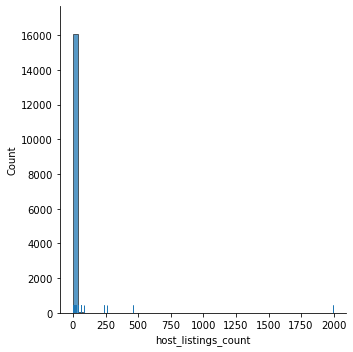

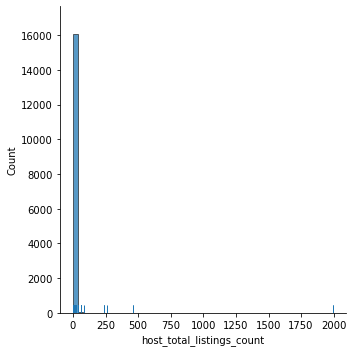

<Figure size 720x360 with 0 Axes>

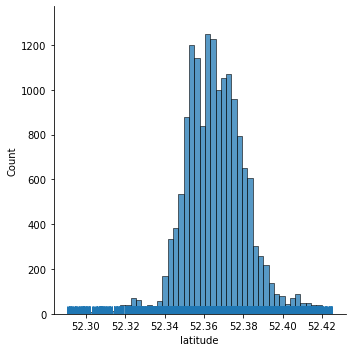

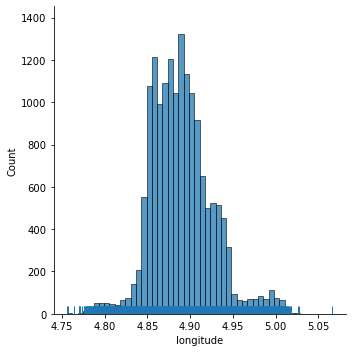

<Figure size 720x360 with 0 Axes>

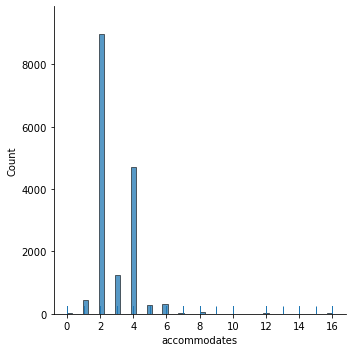

<Figure size 720x360 with 0 Axes>

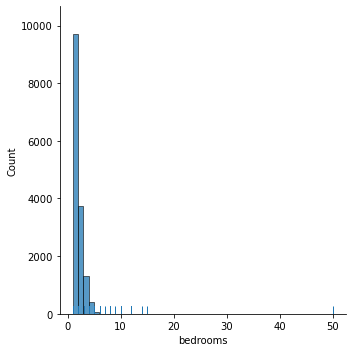

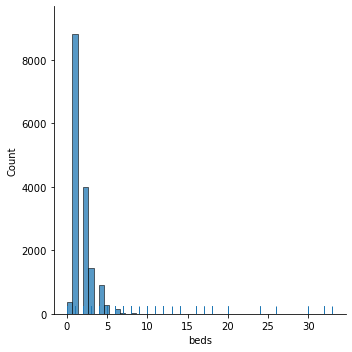

<Figure size 720x360 with 0 Axes>

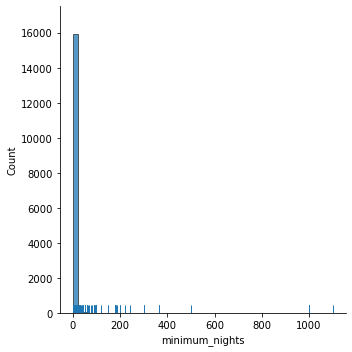

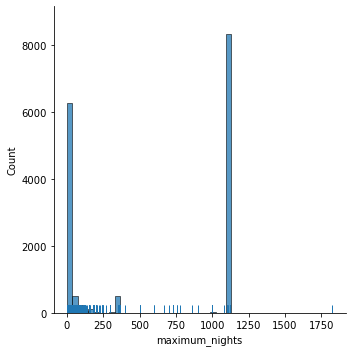

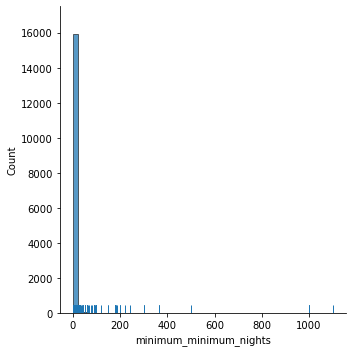

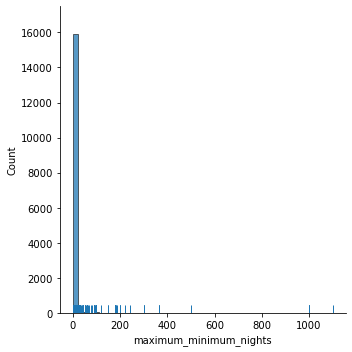

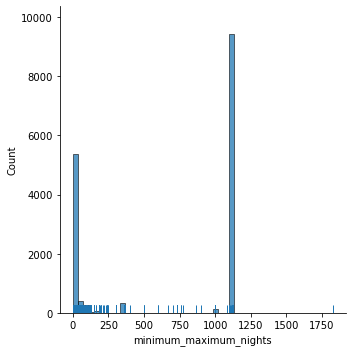

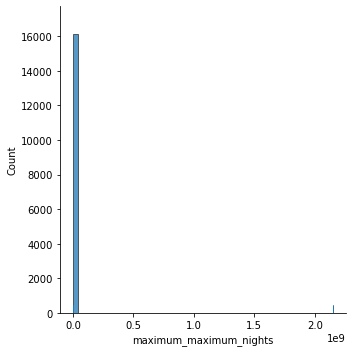

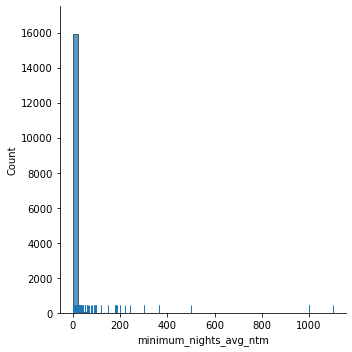

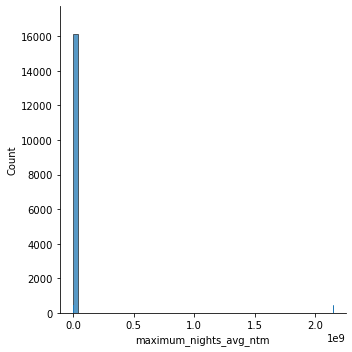

<Figure size 720x360 with 0 Axes>

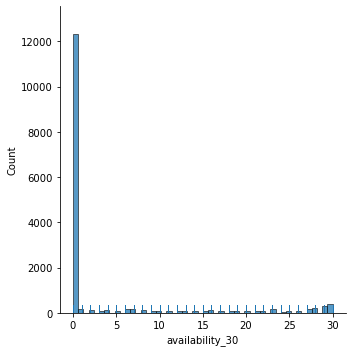

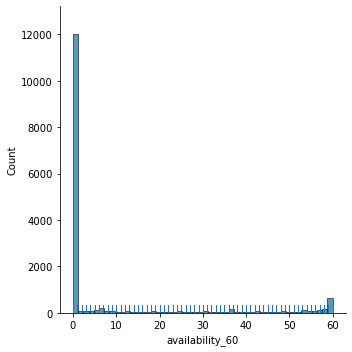

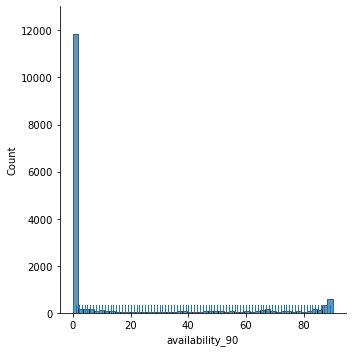

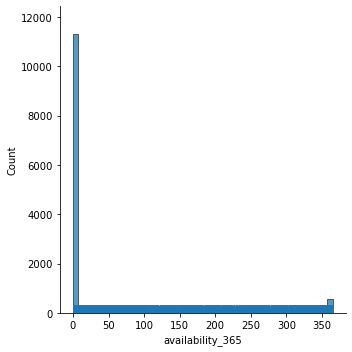

<Figure size 720x360 with 0 Axes>

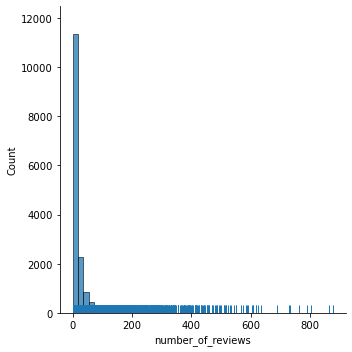

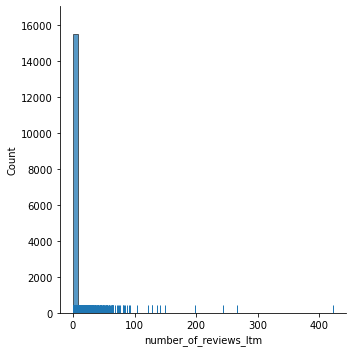

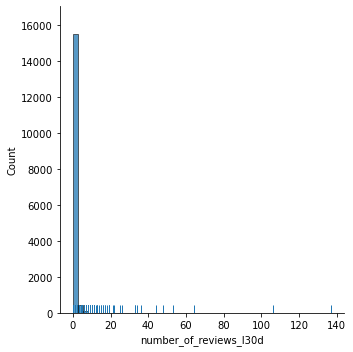

<Figure size 720x360 with 0 Axes>

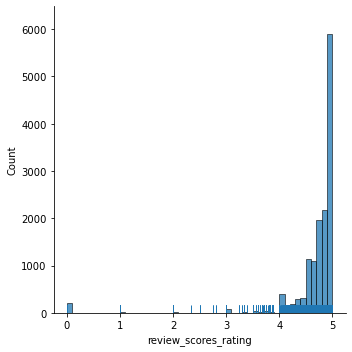

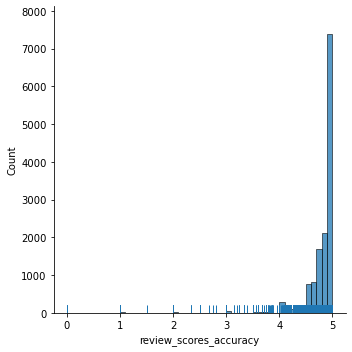

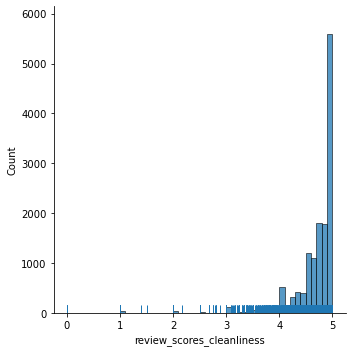

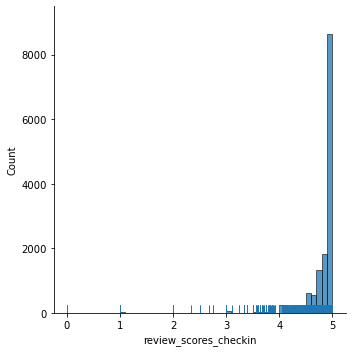

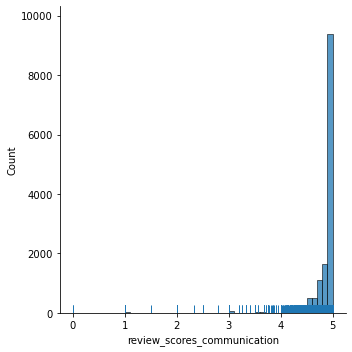

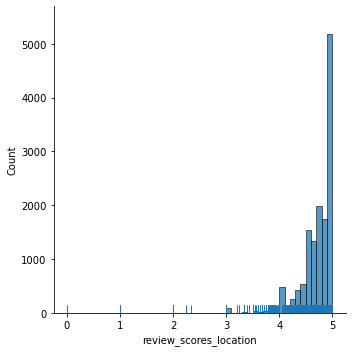

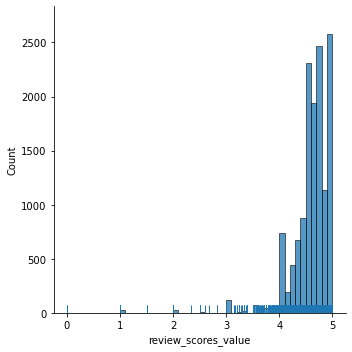

<Figure size 720x360 with 0 Axes>

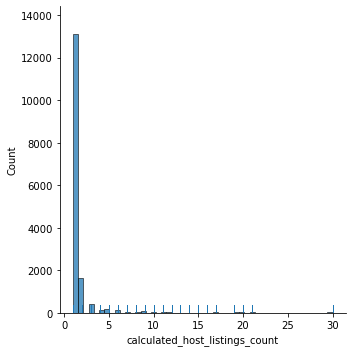

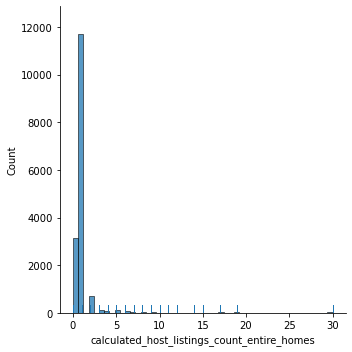

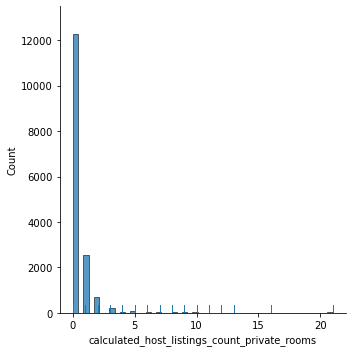

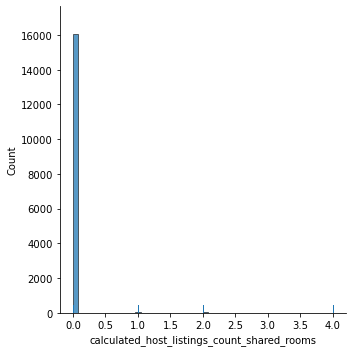

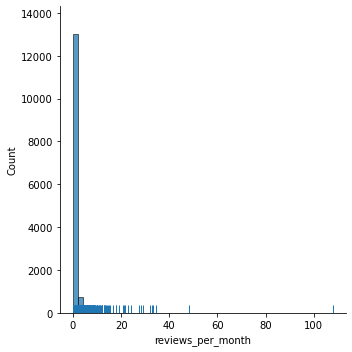

In [37]:
for i, col in enumerate(df.columns):
    if col in num_cols:
        plt.figure(i)
        sns.displot(df[col], kde=False, rug=True, bins=50)

In [38]:
plt.close('all')

Looking at the numerical variables:

- host_listings_count/host_total_listings_count: most of them are <100 which makes sense, since most people would list their own house as airbnb. It does have an outlier of 2000. With so many same values, maybe the column isnt that helpful. The two column are also probably highly correlated.
- accomodates: shows the data is skewed to the left, with most values between 1 and 6, with one outlier in the 16 range.
- bedrooms: shows the data is skewed to the left, with most values less than 10, with one outlier of 50. 
- similar story with beds as bedrooms.
- min_nights: most of the values are in the first bin, with a few above that. Few outliers, especially the >1000 nights. 
- max_nights: the max night has most values above 1000, which seems to be like a default value if the host doesnt type in max nights while listing the place
- similar story as min_nights for min_min_nights, min_max_nights, max_min_nights, max_max_nights and min_nights_avg_ntm. They all seem highly correlated with each other. 
- all the availability columns are highly skewed with most values less than 5
- number of review columns are also skewed and likely to be highly correlated
- review scores columns should be categorical 

### Cleaning the dataset

In [67]:
# removing columns that are in extra. 

extra.remove('id')

df2 = df.copy()
df2 = df2.drop(extra, axis=1) 

In [68]:
df2.head()

,id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100%,100%,t,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room in rental unit,Private room,2,1.5 shared baths,1.0,2.0,"[""Single level home"", ""Coffee maker"", ""Long te...",$59.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,3,28,55,124,2021-09-07,280,2,0,2013-08-25,2019-11-21,4.89,4.93,5.00,4.97,4.97,4.68,4.81,t,1,0,1,0,2.86
1,20168,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100%,100%,f,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,4.89393,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,2021-09-07,339,0,0,2014-01-17,2020-03-27,4.44,4.69,4.79,4.63,4.62,4.87,4.49,t,2,0,2,0,3.64
2,25428,2009-11-20,"New York, New York, United States",NaN,NaN,0%,t,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,52.37490,4.88487,Entire rental unit,Entire home/apt,3,1 bath,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Long term stays ...",$125.00,14,120,7.0,14.0,120.0,120.0,13.8,120.0,t,1,1,3,57,2021-09-07,5,0,0,2018-01-21,2020-01-02,5.00,5.00,5.00,5.00,5.00,5.00,4.80,f,1,1,0,0,0.11
3,27886,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,86%,100%,t,Westelijke Eilanden,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5 baths,1.0,1.0,"[""Coffee maker"", ""Long term stays allowed"", ""P...",$141.00,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,9,20,47,66,2021-09-07,223,4,2,2013-02-17,2021-08-21,4.95,4.93,4.96,4.95,4.92,4.90,4.80,t,1,0,1,0,2.14
4,28871,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100%,98%,t,Amsterdam Centrum,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Shampoo"", ""Dryer"", ""Hangers"", ""...",$75.00,2,1825,2.0,2.0,1825.0,1825.0,2.0,1825.0,t,11,27,50,298,2021-09-08,353,19,8,2015-05-18,2021-08-27,4.87,4.94,4.89,4.97,4.94,4.97,4.82,f,2,0,2,0,4.59


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16116 non-null  int64  
 1   host_since                                    16111 non-null  object 
 2   host_location                                 16081 non-null  object 
 3   host_response_time                            5036 non-null   object 
 4   host_response_rate                            5036 non-null   object 
 5   host_acceptance_rate                          5171 non-null   object 
 6   host_is_superhost                             16111 non-null  object 
 7   host_neighbourhood                            10403 non-null  object 
 8   host_listings_count                           16111 non-null  float64
 9   host_total_listings_count                     16111 non-null 